# Minute Weather Dataset

The **minute weather dataset** comes from a weather station located in San Diego, California. The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity. Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured. The data is in the file **minute_weather.csv**, which is a comma-separated file.

Each row in **minute_weather.csv** contains weather data captured for a one-minute interval. Each row, or sample, consists of the following variables:

* **rowID:** 	unique number for each row	(*Unit: NA*)
* **hpwren_timestamp:**	timestamp of measure	(*Unit: year-month-day hour:minute:second*)
* **air_pressure:** air pressure measured at the timestamp	(*Unit: hectopascals*)
* **air_temp:**	air temperature measure at the timestamp	(*Unit: degrees Fahrenheit*)
* **avg_wind_direction:**	wind direction averaged over the minute before the timestamp	(*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **avg_wind_speed:**	wind speed averaged over the minute before the timestamp	(*Unit: meters per second*)
* **max_wind_direction:**	highest wind direction in the minute before the timestamp	(*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed:**	highest wind speed in the minute before the timestamp	(*Unit: meters per second*)
* **min_wind_direction:**	smallest wind direction in the minute before the timestamp	(*Unit: degrees, with 0 being North and inceasing clockwise*)
* **min_wind_speed:**	smallest wind speed in the minute before the timestamp	(*Unit: meters per second*)
* **rain_accumulation:**	amount of accumulated rain measured at the timestamp	(*Unit: millimeters*)
* **rain_duration:**	length of time rain has fallen as measured at the timestamp	(*Unit: seconds*)
* **relative_humidity:**	relative humidity measured at the timestamp	(*Unit: percent*)

Using this dataset, we will learn to train a KMeans clustering model and visualize the differences of feature "air_temp" among different clusters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install mglearn
import mglearn
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data = pd.read_csv('minute_weather.csv')

In [3]:
data.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity'],
      dtype='object')

In [4]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [5]:
data.shape

(1587257, 13)

In [6]:
#There is huge amount of data. Let's sample the data and analyse it

data = data.sample(frac=0.1)
data.shape

(158726, 13)

In [7]:
data = data.dropna()

In [8]:
data.shape

(158681, 13)

In [9]:
data = data.drop('rowID', axis=1)

In [10]:
data.head()

,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
1401924,2014-05-05 04:21:49,915.8,56.48,184.0,5.0,190.0,5.7,181.0,4.5,0.0,0.0,36.3
1065214,2013-08-27 18:22:05,913.4,76.46,355.0,2.0,6.0,2.6,333.0,1.2,0.0,0.0,40.2
1117251,2013-10-02 22:20:03,915.1,58.46,71.0,1.4,86.0,1.6,48.0,1.2,0.0,0.0,77.4
652936,2012-11-14 07:03:07,919.9,65.12,200.0,1.2,224.0,1.9,190.0,0.8,0.0,0.0,12.6
1205266,2013-12-19 09:29:07,909.8,43.34,189.0,4.7,197.0,6.1,181.0,3.2,0.0,0.0,90.3


In [11]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [12]:
selected_data = data[features]

In [13]:
#Standardize the Features using StandardScaler
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(selected_data)
X

array([[-0.33862148, -0.45517056,  0.23188775, ...,  0.28527694,
         0.94620533, -0.43248825],
       [-1.12671096,  1.23022551,  2.0292722 , ..., -1.70699813,
        -0.33049806, -0.28330066],
       [-0.56848091, -0.28814933, -0.95585752, ..., -0.84079158,
        -0.74233787,  1.13971943],
       ...,
       [ 0.84351275, -1.66987044,  2.05029424, ..., -1.45796374,
        -0.98944175, -0.31390325],
       [ 0.31811976, -0.75884553,  0.70488366, ...,  0.83748362,
         1.11094125,  0.98288119],
       [-0.27294735,  1.32132801,  0.50517428, ...,  0.69672505,
        -0.98944175, -0.3559818 ]])

In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


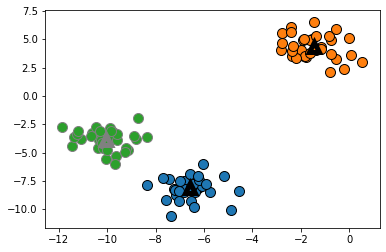

In [16]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=5)